In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
from helpers_images import read_metadata, read_results, get_indexes
from helpers_plots import _ax_dot_active_cell

In [3]:
# reload automaticaly external modules
%load_ext autoreload
%autoreload 2

### **Results paths**

In [4]:
paths_all = []
with open("./paths.txt") as f:
    paths_all = f.read().splitlines()
for i,p in enumerate(paths_all):
    print(f'{i: >2}: {p}')

 0: outputs/formatage/120/03_04_01_double_hline
 1: outputs/formatage/529/03_04_01_double_hline
 2: outputs/formatage/319/03_04_01_double_hline
 3: outputs/formatage/259/03_04_01_double_hline
 4: outputs/formatage/712/03_04_01_double_hline
 5: outputs/formatage/777/03_04_01_double_hline
 6: outputs/formatage/557/03_04_01_double_hline


In [37]:
paths = paths_all[-2:];paths

['outputs/formatage/777/03_04_01_double_hline',
 'outputs/formatage/557/03_04_01_double_hline']

In [38]:
degrees      = []
rows         = []
cols         = []
heights      = []
indexes      = []
stresses     = []
percents     = []
connectivity = []
energies     = []
active_cells = []
percents_per_steps = []

for path, dep in zip(paths, ['incremental','incremental']):
        degree_, rows_, cols_, *_  = read_metadata(path)
        connectivity_,_, heights_, active_cells_, percents_per_steps_, stresses_,  el_energies_ =\
                read_results(path, dep, 'maxBending')

        degrees.append(degree_)
        rows.append(rows_)
        cols.append(cols_)
        heights.append(heights_)
        indexes.append(get_indexes(degree_, rows_, cols_))
        c = np.array(connectivity_)
        stresses.append([s[c[:,0], c[:,1]]for s in stresses_])
        energies.append(el_energies_)
        active_cells.append(active_cells_)
        percents_per_steps.append(percents_per_steps_)

In [57]:
for i in zip(np.array(heights).transpose((1,0,2)), np.array(percents_per_steps).transpose((1,0,2))):
    print(i)


(array([[0.47494192, 0.47494164, 0.4749409 , 0.47494122, 0.47494072,
        0.47494093, 0.47494192, 0.47494153],
       [0.4750127 , 0.47493963, 0.47494016, 0.47493981, 0.47494071,
        0.47494145, 0.47494193, 0.47494192]]), array([[0., 0.],
       [0., 0.]]))
(array([[0.47489348, 0.47104956, 0.45695504, 0.46416819, 0.4494108 ,
        0.44153946, 0.4274839 , 0.4333455 ],
       [0.47247518, 0.47175146, 0.47175147, 0.47175146, 0.47175147,
        0.47175147, 0.42808987, 0.47379885]]), array([[10.,  0.],
       [10.,  0.]]))
(array([[0.47485415, 0.46789944, 0.4410382 , 0.4549945 , 0.42604576,
        0.41004392, 0.38000866, 0.39306243],
       [0.4713503 , 0.4702395 , 0.4702395 , 0.4702395 , 0.4702395 ,
        0.4702395 , 0.38076655, 0.47321209]]), array([[20.,  0.],
       [20.,  0.]]))
(array([[0.47481941, 0.46512063, 0.42609315, 0.44659826, 0.40365778,
        0.37936979, 0.33252756, 0.35331573],
       [0.47133991, 0.46913023, 0.46913023, 0.46913023, 0.46913024,
        0.46913

[0. 0.]
[6, 0] [0.47494192 0.47494192]
[0. 0.]
[6, 7] [0.47494193 0.47494192]
[10.  0.]
[6, 0] [0.4274839  0.47489348]
[10.  0.]
[6, 7] [0.42808987 0.47379885]
[20.  0.]
[6, 0] [0.38000866 0.47485415]
[20.  0.]
[6, 7] [0.38076655 0.47321209]
[30.  0.]
[6, 0] [0.33252756 0.47481941]
[30.  0.]
[6, 7] [0.33338257 0.47276833]
[40.  0.]
[6, 0] [0.28504373 0.47478746]
[40.  0.]
[6, 7] [0.28597631 0.47239306]
[50.  0.]
[6, 0] [0.23755844 0.47475739]
[50.  0.]
[6, 7] [0.23855823 0.47205893]
[60.  0.]
[6, 0] [0.19007237 0.47472862]
[60.  0.]
[6, 7] [0.19113172 0.47175311]
[70.  0.]
[6, 0] [0.14258594 0.47470077]
[70.  0.]
[6, 7] [0.14369748 0.47146921]
[80.  0.]
[6, 0] [0.09509956 0.47467353]
[80.  0.]
[6, 7] [0.09625539 0.47120467]
[90.  0.]
[6, 0] [0.04761369 0.4746466 ]
[90.  0.]
[6, 7] [0.04880662 0.47095976]
[100.   0.]
[6, 0] [1.28943955e-04 4.74619622e-01]
[100.   0.]
[6, 7] [0.00143187 0.47072287]


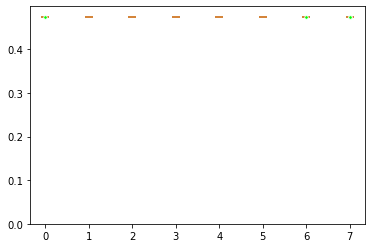

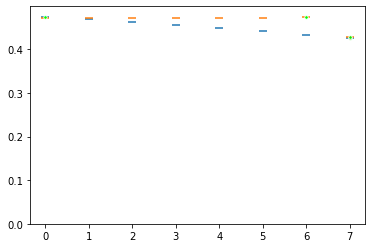

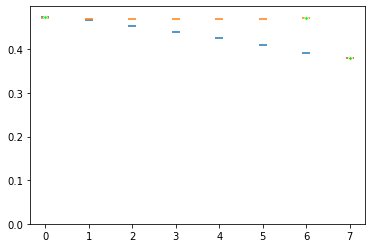

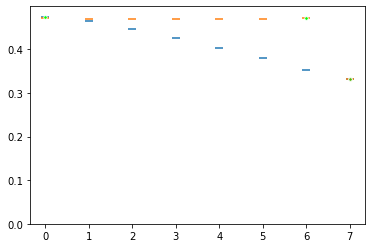

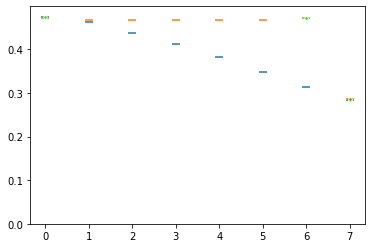

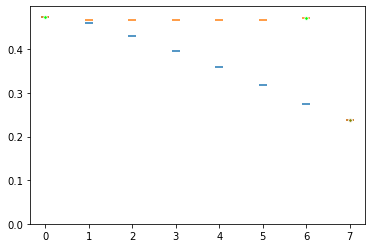

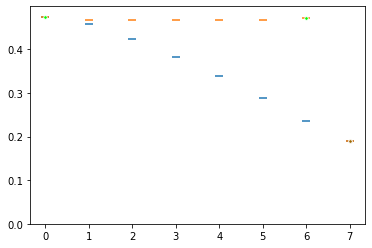

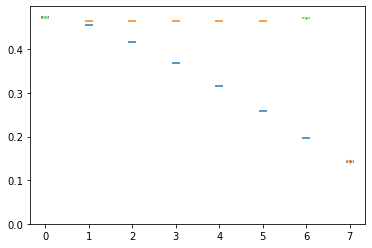

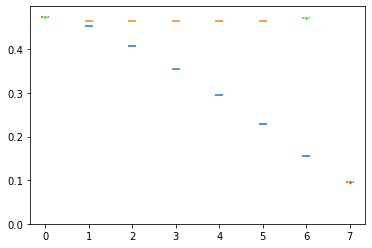

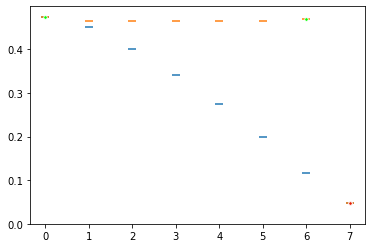

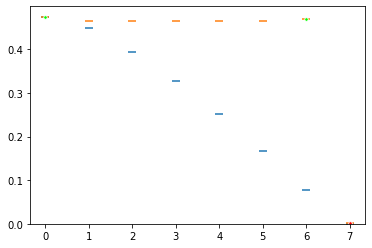

In [75]:
max_y = 1.05*np.array(heights).max()
for heights_, p_ in zip(np.array(heights).transpose((1,0,2)), np.array(percents_per_steps).transpose((1,0,2))):
    _, ax = plt.subplots()
    for idx, h, a, p in zip(indexes, heights_, active_cells, p_):
        print(p)
        print(a, h[a])
        ax.scatter(idx,h, marker='_', s=50)
        _ax_dot_active_cell(ax, a, p, np.array([idx, h, h]).T)
    ax.set_ylim(0, max_y)


In [8]:
datas = energies
np.array(datas).shape

(2, 11)

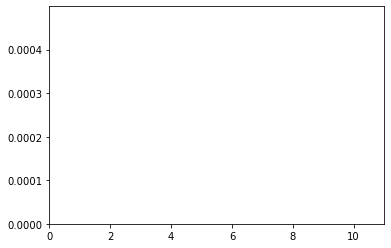

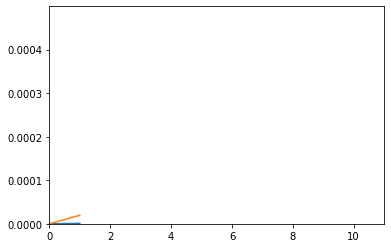

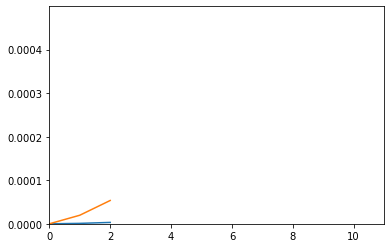

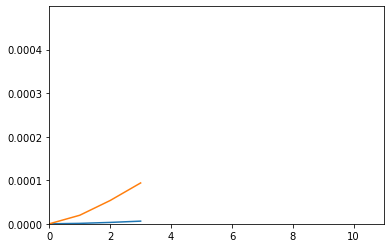

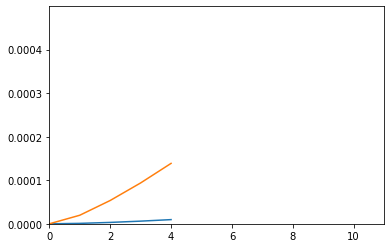

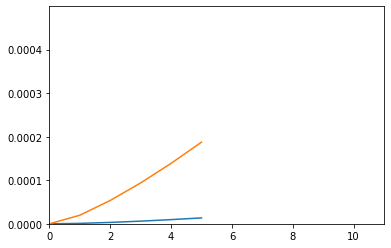

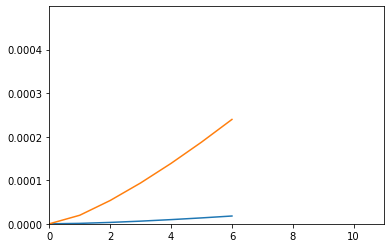

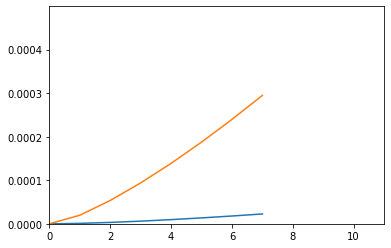

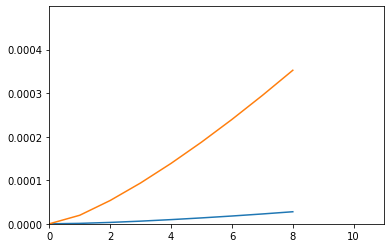

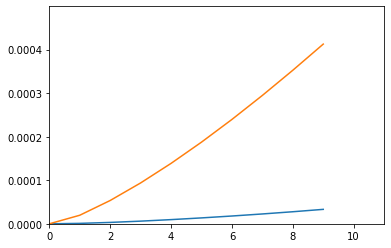

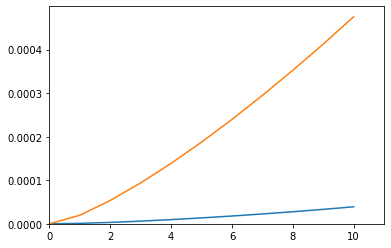

In [9]:

max_y = 1.05*np.array(datas).max()
max_x = np.array(datas).shape[1]
e = []
for d_ in np.array(datas).transpose():
    e.append(d_)
    _, ax = plt.subplots()
    ax.set_ylim(0, max_y)
    ax.set_xlim(0, max_x)
    ax.plot(e)

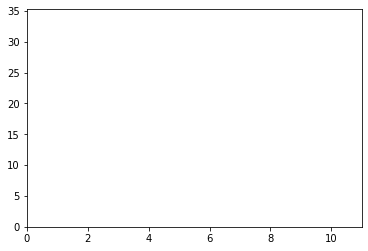

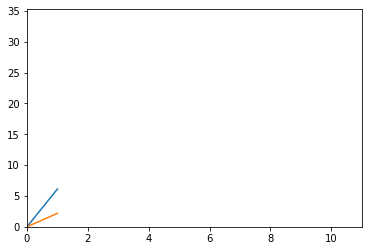

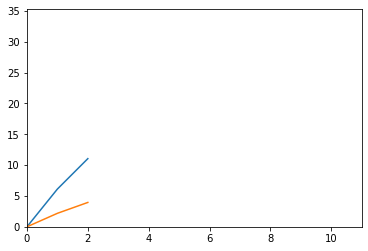

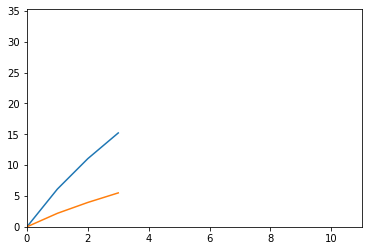

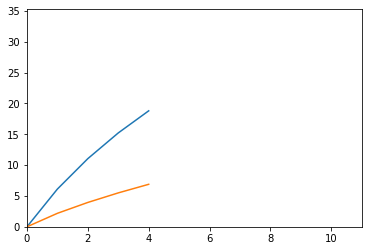

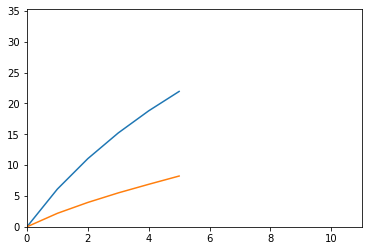

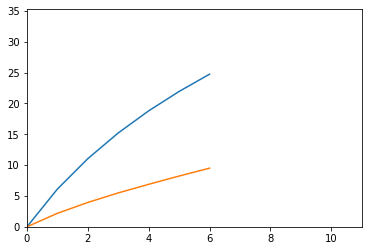

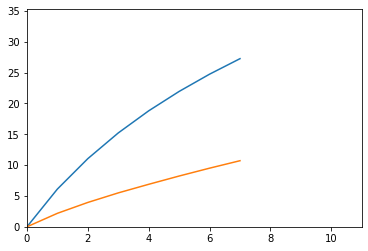

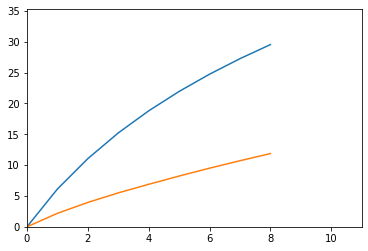

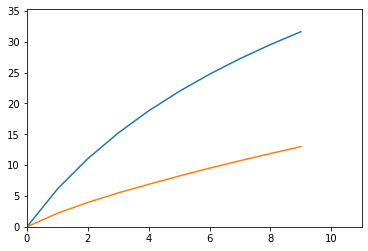

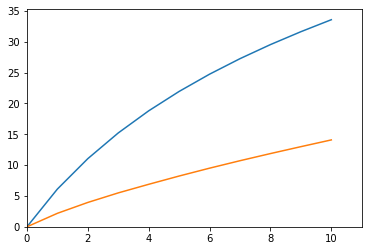

In [64]:
max_y = 1.05*np.array(stresses).max()
max_x = np.array(stresses).shape[1]
max_s = []
for s_ in np.array(stresses).transpose((1,0,2)):
    max_s.append(np.array(s_).max(axis=1))
    _, ax = plt.subplots()
    ax.set_ylim(0, max_y)
    ax.set_xlim(0, max_x)
    ax.plot(max_s)

In [ ]:
degrees = []
rows    = []
cols    = []
heights = []
indexes = []

for path, dep in zip(paths, ['linear']*len(paths)):
    degree_, rows_, cols_, *_  = read_metadata(path)
    _,_, heights_, *_ = read_results(path, dep, 'maxBending')
    
    degrees.append(degree_)
    rows.append(rows_)
    cols.append(cols_)
    heights.append(heights_)
    indexes.append(get_indexes(degree_, rows_, cols_))
    

max_y = 1.05*np.array(heights).max()
for i, heights_ in enumerate(np.array(heights).transpose((1,0,2))):
    _, ax = plt.subplots()
    ax.set_ylim(0, max_y)
    for idx, h in zip(indexes, heights_):
        # ax.plot(h[idx])
        ax.scatter(idx,h)
    
    # [RK] can we infer indexes from connectivity?
    

### **Metadata**

In [ ]:
degree, rows, cols, *_unused  = read_metadata(paths)

### **Load Results**

In [ ]:
connectivity,        \
init_center_pos,     \
heights,             \
active_cells,        \
percents_per_steps,  \
stresses_per_steps = \
    read_results(paths)

### **plot heights**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
indexes = get_indexes(degree, rows, cols)
max_y = 1.05*np.array(heights).max()
for h in heights:
    _, ax = plt.subplots()
    ax.set_ylim(-0.05, max_y)
    ax.scatter(indexes, h)

### **Images**

In [ ]:
plot2D_steps(connectivity,
             active_cells,
             percents_per_steps,
             init_center_pos,
             stresses_per_steps,
             stress_type='maxBending',
             dir_name=path,
             show_percent=False,
             show_plot=False)

In [ ]:
if cols==1 or rows==1:
    plot1D_steps(connectivity,
                 active_cells,
                 percents_per_steps,
                 init_center_pos,
                 stresses_per_steps,
                 stress_type='maxBending',
                 dir_name=path,
                 show_percent=False,
                 show_plot=False)

### **GIF**

In [ ]:
fps  = 3 # frames per seconds
loop = 2 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...
for name in ['structure_all', 'structure_perSteps', 'structure_own', 'scatter', 'sPlot']:
    img_name_i = f'"{path}/jpg/*{name}*.jpg"'
    gif_name_i = f'"{path}/jpg/gif/{name}.gif"'
    !ffmpeg  -loglevel panic -f image2 -r $fps -pattern_type glob -i $img_name_i -loop $loop $gif_name_i
    img_name_i = f'{path}/png/*{name}*.png'
    gif_name_i = f'{path}/png/gif/{name}.gif'
    !gifski --quiet -o $gif_name_i --fps $fps --repeat $loop --quality 100 $img_name_i
    

In [2]:
import csv
path = './outputs/formatage/777/03_04_01_double_hline/incremental_deployment/energies.csv'
reader = csv.DictReader(open(path))
print(reader.fieldnames)

None


In [5]:
out = []
with open(path,"r", newline='') as csvfile:
    reader = csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    for row in reader:
        out.append(row)

ValueError: could not convert string to float: 'Full'

In [4]:
datas = []
with open(path, "r") as csvfile: 
    reader = csv.reader(csvfile)
    header = next(reader, None)
    for row in reader:
        datas.append(row)

In [12]:
header

['Full',
 'Elastic',
 'Deployment',
 'Repulsion',
 'Attraction',
 'AngleBoundPenalty']

In [17]:
[float(d[1]) for d in datas]

[4.5701179169064526e-15,
 9.780152943953602e-07,
 3.1764311772287655e-06,
 6.115247722372583e-06,
 9.602891598371465e-06,
 1.3543853495817094e-05,
 1.7886445782497323e-05,
 2.2604091526689032e-05,
 2.7689265536854812e-05,
 3.3154786532330776e-05,
 3.903909550380851e-05]